### infos

# todos


In [1]:
import sys
import matplotlib.pyplot as plt

sys.path.insert(0,'..')

import pandas as pd
import numpy as np
from pathlib import Path

from BankClassify import BankClassify

In [2]:

%load_ext autoreload

%autoreload 2

### load data and create classifier

In [3]:
bc = BankClassify(Path('../data'), verbose= 3, prob_threshold=0.999)

FFFFF /Users/jangie/Projects/DataScience/BankClassify/notebooks/../BankClassify.py
loaded previous dkb data 1689 entries
train dataset size 1112
ddd /Users/jangie/Projects/DataScience/BankClassify/notebooks/../data/categories.txt


In [4]:
data_unlabeled = bc.data_unlabeled
print(f"{len(data_unlabeled)} unlabeled entries")
predictions = bc._make_predictions(data_unlabeled)

155 unlabeled entries
ddd /Users/jangie/Projects/DataScience/BankClassify/notebooks/../data/categories.txt


In [5]:
# predictions.columns = ['class_guess', 'class_prob']
# predictions

In [6]:
df = bc.data_all
print(len(df), len(bc.data['dkb']))
grouped = df.groupby([df.date.dt.year, df.date.dt.month, df['class']])['amount'].sum()

grouped.index.rename(['year','month','class'], inplace=True)
grouped.index = pd.MultiIndex.from_tuples([(pd.to_datetime(f"{s[0]}-{s[1]}", format='%Y-%m'), s[2]) for s in grouped.index])
grouped = grouped.reindex(pd.MultiIndex.from_product(grouped.index.levels)) # get a value for all index combinations

1267 1689


In [235]:
# [~df['class'].dropna().str.contains('Income')]

In [7]:
len(grouped)

672

In [8]:
# pd.date_range(start=grouped.index.levels[0].min(), end=grouped.index.levels[0].max(), freq='M')

In [9]:
grouped.index.levels[0].min(), grouped.index.levels[0].max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2022-08-01 00:00:00'))

In [11]:
# grouped[:, 'Income - Presents']

### plot income

In [24]:
income

['Income - Presents', 'Income - Salary & Benefits']

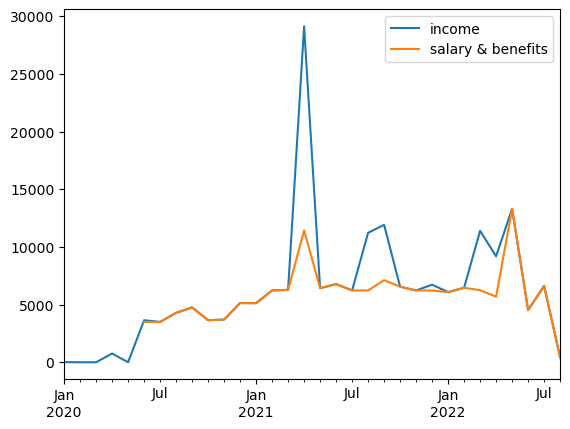

In [27]:
income = [s  for s in grouped.index.levels[1] if ('Income'  in s and 'Reimbursement' not in s)]
sum([grouped[:, s ].fillna(0) for s in income]).plot(label = 'income')
grouped[:, 'Income - Salary & Benefits'].plot(label = 'salary & benefits')
plt.legend()

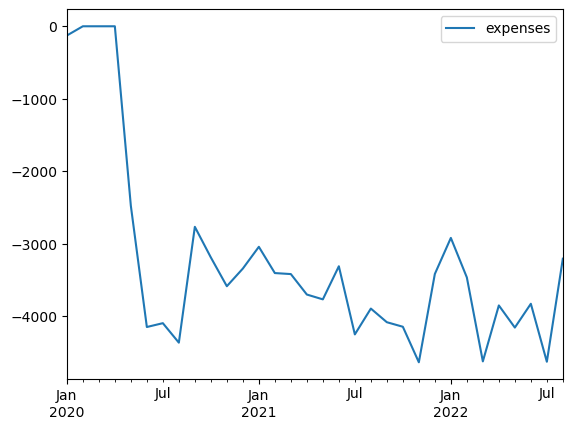

In [12]:
# sum up everything that is not Income or Investment
expenses = [s  for s in grouped.index.levels[1] if not ('Income'  in s or 'Investments'  in s)]
sum([grouped[:, s ].fillna(0) for s in expenses]).plot(label = 'expenses')
plt.legend()

In [127]:
# grouped[:,:, 'class']

<AxesSubplot: >

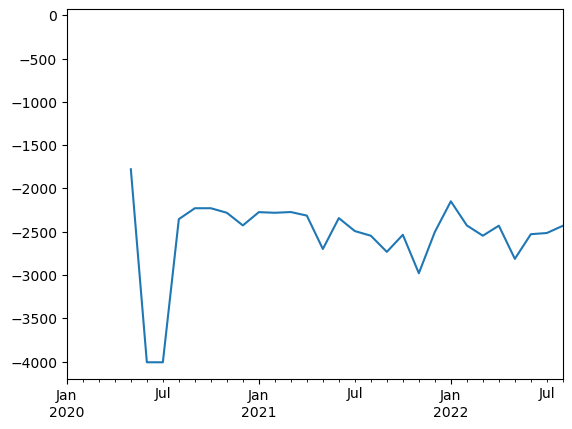

In [13]:
grouped[:,'Bill - Utilities, Rent & Fees'].plot()

<AxesSubplot: >

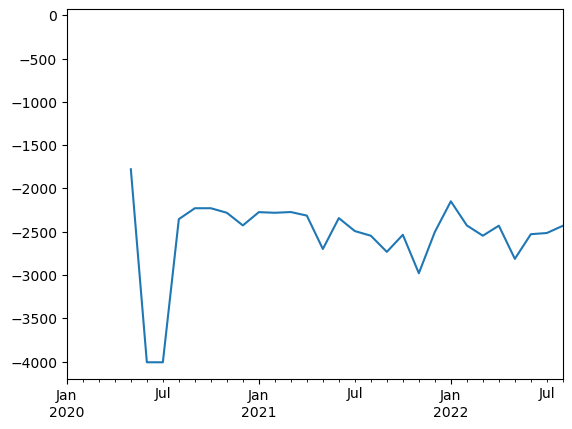

In [14]:
grouped[:,'Bill - Utilities, Rent & Fees'].plot()

In [204]:
grouped.index.levels[1]

Index(['Bill - Communications', 'Bill - Health', 'Bill - Insurrance',
       'Bill - Utilities, Rent & Fees', 'Car', 'Clothes & Shopping',
       'Education', 'Entertainment, Hobbies & Memberships',
       'Home Improvement & Stationary', 'Income - Presents',
       'Income - Reimbursement', 'Income - Salary & Benefits', 'Investments',
       'Other', 'Personal Care & Sport', 'Presents for Others',
       'Public Transport', 'Restaurants & Bars',
       'Supermarket & Everyday commodities'],
      dtype='object')

<AxesSubplot: >

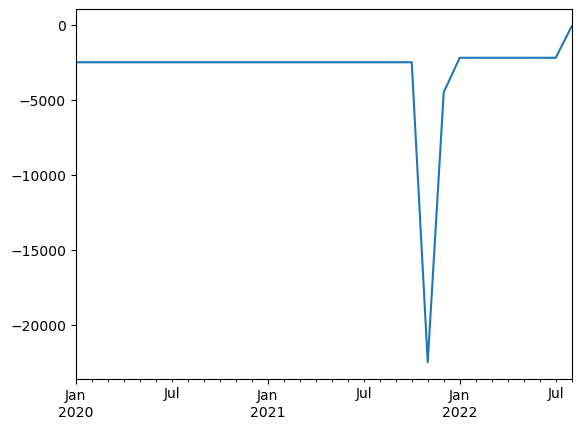

In [15]:
grouped[:,'Investments'].plot()

In [17]:
grouped[:,'Investments'].sum()

-97500.0